In [27]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,Dropout,BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.utils import to_categorical,plot_model
import os

In [28]:
encoder=OneHotEncoder()
encoder.fit([[0], [1]])

OneHotEncoder()

# DATA SET CREATION

In [29]:
#TOMATO IMAGE

In [30]:
data=[]
paths=[]
result=[]
for r,d,f in os.walk(r"C:\\Users\\ADMIN\\Downloads\\train\\tomatoes"):
    for file in f:
        if '.jpg'  or '.jpeg' in file:
            paths.append(os.path.join(r, file))
for path in paths:
    img=Image.open(path)
    img=img.resize((128,128))
    img=np.array(img)
    if(img.shape==(128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())
    

In [31]:
#APPLE IMAGE

In [32]:
paths = []
for r, d, f in os.walk(r"C:\\Users\\ADMIN\\Downloads\\train\\apples"):
    for file in f:
        if '.jpg' in file or 'jpeg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [33]:
data=np.array(data)
data.shape


(258, 128, 128, 3)

In [34]:
result = np.array(result)
result = result.reshape(258,2)

# visualisation

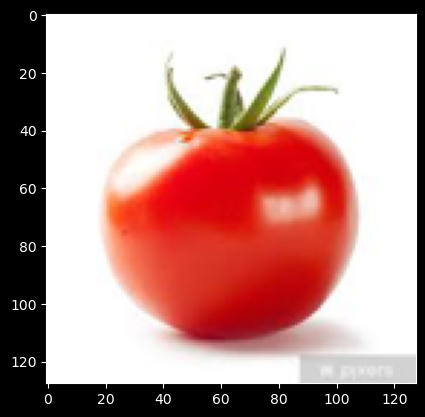

In [35]:
plt.imshow(data[1])

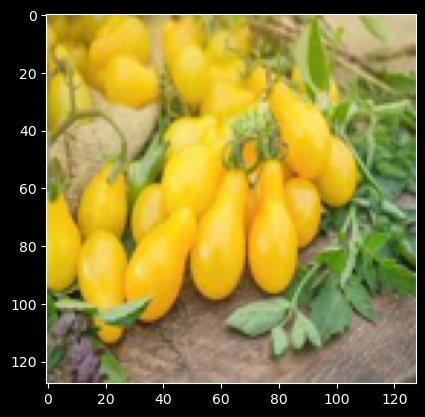

In [36]:
plt.imshow(data[129])

# data splitting

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(data,result,test_size=.25,shuffle=True,random_state=0)

# CNN model

In [38]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(5,5),input_shape=(128,128,3),padding='same'))
model.add(Conv2D(32,kernel_size=(5,5),activation='relu',padding='same'))
model.add(Dropout(0.45))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.45))
model.add(Conv2D(64,kernel_size=(5,5),activation='relu',padding='same'))
model.add(Conv2D(64,kernel_size=(5,5),activation='relu',padding='same'))
model.add(Dropout(0.45))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2,activation='sigmoid'))
print(model.summary())




Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      2432      
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      25632     
                                                                 
 dropout_5 (Dropout)         (None, 128, 128, 32)      0         
                                                                 
 batch_normalization_2 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 64, 64, 32)       

# model configuration

In [39]:
model.compile(loss="binary_crossentropy",optimizer='sgd',metrics=['accuracy'])


In [40]:
xtrain.shape

(193, 128, 128, 3)

In [41]:
ytrain.shape

(193, 2)

# model training

In [42]:
history=model.fit(xtrain,ytrain,epochs=40,batch_size=64,verbose=1,validation_data=(xtest,ytest))

Epoch 1/40
4/4 [==============================] - 10s 2s/step - loss: 8.3763 - accuracy: 0.4767 - val_loss: 175.5432 - val_accuracy: 0.5538
Epoch 2/40
4/4 [==============================] - 7s 2s/step - loss: 1.9999 - accuracy: 0.5440 - val_loss: 7.0000 - val_accuracy: 0.5538
Epoch 3/40
4/4 [==============================] - 7s 2s/step - loss: 1.0564 - accuracy: 0.6010 - val_loss: 25.9190 - val_accuracy: 0.4462
Epoch 4/40
4/4 [==============================] - 6s 1s/step - loss: 3.4795 - accuracy: 0.5596 - val_loss: 2.5044 - val_accuracy: 0.5538
Epoch 5/40
4/4 [==============================] - 8s 2s/step - loss: 1.2662 - accuracy: 0.6373 - val_loss: 3.7392 - val_accuracy: 0.5538
Epoch 6/40
4/4 [==============================] - 7s 2s/step - loss: 1.2188 - accuracy: 0.6425 - val_loss: 3.9607 - val_accuracy: 0.4462
Epoch 7/40
4/4 [==============================] - 6s 1s/step - loss: 1.2803 - accuracy: 0.6062 - val_loss: 3.3494 - val_accuracy: 0.5538
Epoch 8/40
4/4 [=====================

In [43]:
score=model.evaluate(xtest,ytest,batch_size=64)
print("\n Test accuracy:%.1f%%"%(100*score[1]))

2/2 [==============================] - 0s 16ms/step - loss: 1.8028 - accuracy: 0.4615

 Test accuracy:46.2%
